[Table of Contents](./table_of_contents.ipynb)

# H Infinity filter

In [1]:
%matplotlib inline
from __future__ import division, print_function

In [2]:
#format the book
import book_format
book_format.set_style()

I am still mulling over how to write this chapter. In the meantime, Professor Dan Simon at Cleveland State University has an accessible introduction here:

http://academic.csuohio.edu/simond/courses/eec641/hinfinity.pdf

In one sentence the $H_\infty$ (H infinity) filter is like a Kalman filter, but it is robust in the face of non-Gaussian, non-predictable inputs.


My FilterPy library contains an H-Infinity filter. I've pasted some test code below which implements the filter designed by Simon in the article above. Hope it helps.

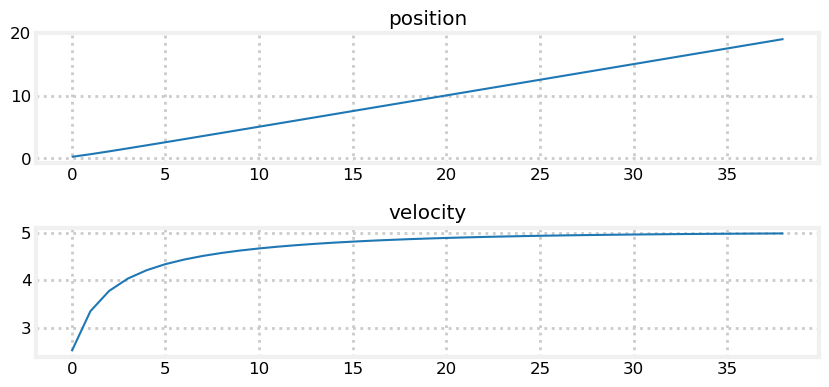

In [3]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

from numpy import array
import matplotlib.pyplot as plt

from filterpy.hinfinity import HInfinityFilter

dt = 0.1
f = HInfinityFilter(2, 1, dim_u=1, gamma=.01)

f.F = array([[1., dt],
             [0., 1.]])

f.H = array([[0., 1.]])
f.G = array([[dt**2 / 2, dt]]).T

f.P = 0.01
f.W = array([[0.0003, 0.005],
             [0.0050, 0.100]])/ 1000  #process noise

f.V = 0.01
f.Q = 0.01
u = 1. #acceleration of 1 f/sec**2

xs = []
vs = []

for i in range(1,40):
    f.update (5)
    #print(f.x.T)
    xs.append(f.x[0,0])
    vs.append(f.x[1,0])
    f.predict(u=u)

plt.subplot(211)
plt.plot(xs)
plt.title('position')
plt.subplot(212)
plt.plot(vs) 
plt.title('velocity');